# PYTHONで包括的なデータ探索
[Pedro Marcelino](http://pmarcelino.com) - February 2017


----------

<b>'人生で最も難しいことは自分を知ることです'</b>  

これはミレトスのタレスの言葉です。タレスは科学思想を楽しみ従事したとして知られた西洋文明で最初の人間として認識されたギリシャ・フェニキアの哲学者、数学者、天文学者でした。（出典：https://en.wikipedia.org/wiki/Thales）

あなたのデータがデータサイエンスにおいて最も難しいことであるはいいたくはありませんが、時間はかかります。したがって、この最初のステップを見落としやすく、水の中にあまりにも早く飛び込みやすい。

それで、私は水の中に飛び込む前に泳ぎ方を学ぶことにしました。Hair et al. (2013)の「あなたのデータを調べる」の章を参考にして、包括的であっても網羅的ではないデータ分析に従うよう最善を尽くしました。
私はこのカーネルの厳格な研究についてリポートするどころか、コミュニティにとって有益であって欲しいと思っています。だからこれらのデータ分析の原則をこの問題にどうやって適用したのか共有しています。
私が各章につけた奇妙な名前にもかかわらず、このカーネルでやっていることは次のようなものです：


1. <b>問題を理解する</b>。 各変数を見て、その問題の意味と重要性についての哲学的分析を行います。
2. <b>単変量研究</b>。 従属変数（ 'SalePrice'）に焦点を絞り、それについてもう少し詳しく知ろうとします。
3. <b>多変量調査</b>。 従属変数と独立変数がどのように関連しているかを理解しようとします。
4. <b>クリーニングの基本</b>。 データセットをクリーニングし、欠落しているデータ、外れ値およびカテゴリ変数を処理します。
5. <b>仮定をテストする</b>。 私たちのデータが大部分の多変量解析技術で必要とされる仮定を満たしているかどうかを確認します。

さあ、たのしんでね。

※従属変数とはプログラミング言語において、演算結果に従って、値が変化する変数。 
※独立変数とはプログラミング言語において、演算を行う際の条件となる変数。  
※外れ値とはデータ解析上は，他の測定値から飛離れた値を意味する。  
※カテゴリ変数とは性別、職業、配偶者の有無など、一般に数や量で測れない変数。  
※単変量とはひとつの対象にデータが1つしかないデータのこと。  
※多変量とはひとつの対象にデータが複数あるデータのこと。  


### 下記のカーネルはライブラリをインポートしている
pandas  
matplotlib.pyplot  
seaborn  
numpy  
scipy.stats  
sklearn.preprocessingからStandardScaler  
scipyからstats  
warnings  
warnings.filterwarnings('ignore')：警告フィルターで	一致した警告を出力しない  
%matplotlib inline：グラフ表示

In [1]:
#　kaggleパーティーに招待
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 下記のカーネルは「train.csv」をロードしている。
 
 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
CSVファイル「train.csv」をロードする関数

In [2]:
#6つのパックを持ってくる
df_train = pd.read_csv('../input/train.csv')

###  以下のメソッドはdf_trainのカラムの値を返す

In [3]:
#　装飾をチェック
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. それで何を期待できるの？

私たちのデータを理解するためには、各変数を見て、その意味を理解し、この問題との関連性を調べようとすることができます。これは時間がかかることはわかっていますが、データセットの風味がわかります。

私たちの分析にいくつかの規律を持たせるために、次の列を持つExcelスプレッドシートを作成することができます：


* <b>変数</ b> - 変数名。
* <b>タイプ</ b> - 変数のタイプの識別。このフィールドには、2つの値、 '数値'または 'カテゴリ'があります。 「数値」とは、値が数値である変数を意味し、「カテゴリ」とは、値がカテゴリである変数を意味する。
* <b>セグメント</ b> - 変数のセグメントの識別。我々は、建物、空間、または場所の3つの可能なセグメントを定義することができます。 「建物」とは、建物の物理的特性に関連する変数（「OverallQual」など）を意味します。 「空間」とは、家の空間特性（「TotalBsmtSF」など）を報告する変数を意味します。最後に、「場所」とは、家がある場所に関する情報を提供する変数（例：'Neighborhood'）を意味します。
* <b>期待</ b> - 「販売価格」の変動影響に関する当社の期待。可能な限りカテゴリを「高」、「中」、「低」として使用可能です。
* <b>結論</ b> - 変数の重要性に関する結論は、データを素早く見ることです。私たちは、「期待」と同じカテゴリー的な尺度を維持することができます。
* <b>コメント</ b> - 私たちに発生した一般的なコメント。

「タイプ」と「セグメント」は将来の参照のためのものですが、「期待」という列は「第六の感覚」を養うため重要です。この列を埋めるには、すべての変数の説明を読み、1つずつ自問します。

* 家を買っているときにこの変数について考えるか？ （たとえば、私たちの夢の家について考えるとき、「石造ベニアタイプ」を気にするのか？）。
* もしそうなら、この変数はどれくらい重要だろうか？ （例えば、「貧しさ」の代わりに「素晴らしい」資材を外観にする場合の影響と、「良い」の代わりに「優れている」場合の影響は何なのか？）。
* この情報はすでに他の変数に記述されているか？ （例えば、 'LandContour'がプロパティの平坦度を与える場合、実際に 'LandSlope'を知る必要がありますか？）

この困難な演習の後、スプレッドシートをフィルタリングし、「高い」「期待」の変数を注意深く見ることができます。次に、ちょうど私たちの期待を修正する「結論」欄を埋めながら、それらの変数と「SalePrice」との間の散布図に突っ込むことが可能です。

私はこのプロセスを経て、以下の変数がこの問題で重要な役割を果たすことができると結論づけました。

* OverallQual（私はそれがどのように計算されたかわからないので好きではない変数です;面白いのは、利用可能な他のすべての変数を使って 'OverallQual'を予測することです）。
* YearBuilt。
* TotalBsmtSF。
* GrLivArea。

私は2つの '建物'の変数（「OverallQual」と「YearBuilt」）と2つの'空間'の変数（「TotalBsmtSF」と「GrLivArea」）で終わった。これは重要なことは「場所、場所、場所」の不動産のマントラに反するのでちょっと予想外かもしれません。この迅速なデータ検査プロセスは、カテゴリ変数には少し厳しい可能性があります。たとえば、「Neigborhood」変数の方が関連性が高いと予想していましたが、データ検査後にはそれを除外しました。
おそらく、これは、箱ひげ図の代わりに、カテゴリ変数の視覚化に適している散布図を使用することに関連している可能性があります。私たちがデータを視覚化する方法は、しばしば結論に影響します。

しかし、この演習の主なポイントは、私たちのデータと期待について少し考えることだったので、私たちは目標を達成したと思います。今度は「会話が少し少なくて、もう少し行動する」時です。  

<b>そうしましょう！</b>

# 2. まず第一に: '販売価格'の分析

'販売価格'が私たちの探求の理由です。私たちがパーティーに行くときと同じです。すでにパーティーの場所にいる理由があります。いつも女性はその理由です。（免責事項：あなたの好みによって、男性、ダンス、アルコールにそれを適応させる）

女性の類推を使うことで、ちょっとした物語を作りましょう。「'販売価格 'と私たちはいかに出会ったか」という物語です。
ダンスパートナーを探していたとき、Kaggleパーティーですべてが始まりました。しばらくしてダンスフロアを探しているうちに、私たちはダンスシューズを履いているバーの近くの女の子を見かけました。それは彼女が踊るためにそこにいるサインだ。私たちは予測モデリングをしたり、分析コンテストに参加することに多くの時間をついやしているので、女の子と話すことはスーパーパワーの一つではなかった。それでも、私たちは試してみました。
「やあ、僕はカギー、君は？　'販売価格'？ 美しい名前だね！'販売価格'ですよね、君についてのデータをいくつかくれますか？私は、2人の関係がうまくいく確率を計算するためのモデルを開発しました。私はそれを私たちに適用したいです！」

### 下記のカーネルは「SalePrice」カラムの数値データに対して各種統計量を計算いている。

In [4]:
#記述統計概要
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* 'まあまあ...あなたの最低価格はゼロよりも大きいようです。 すばらしい！ あなたは私のモデルを破壊する個人的な特性を1つも持っていません！ 私に写真を送ってもらえますか？ 私は知らない...ビーチであなたのような人を...またはジムでの自撮りかも？ '*

### 下記のカーネルは「SalePrice」カラムのヒストグラムとカーネル密度推定による確率密度関数を表示している。

https://seaborn.pydata.org/generated/seaborn.distplot.html

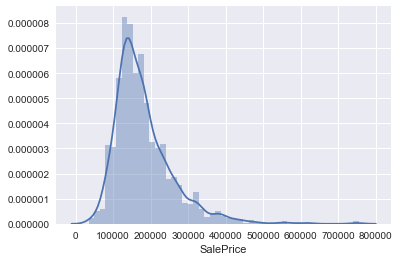

In [5]:
#ヒストグラム
sns.distplot(df_train['SalePrice']);

#### <考察> 上のヒストグラムから'SalePrice'の100000〜200000に集中していることがわかる

'ああ！ あなたが外出時にはシーボーン化粧品を使っているのがわかります...とても上品ですね！ 私もあなただとわかります：

* *正規分布から逸脱している*
* *正の歪みがあります。*
* *ピークを表示する *

*これは面白いです！ 'SalePrice'、あなたの体のサイズを教えてくれますか？ '*

<b>※正規分布とは以下の特徴を持つものです</b>

-平均値と最頻値と中央値が一致する。  
-平均値を中心にして左右対称である。（直線x=μ(平均値)に関して対称）  
-x軸が漸近線である。  
-分散（標準偏差）が大きくなると、曲線の山は低くなり、左右に広がって平らになる。分散（標準偏差）が小さくなると、山は高くなり、よりとんがった形になる。

### 下記のカーネルは'SalePrice'の歪度と、尖度を計算

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.skew.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.kurt.html

skew():歪度を計算  
kurt() :尖度を計算

In [6]:
#　歪度と尖度

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'素晴らしい！ 私の愛しい計算機が正しい場合、私たちの成功確率は97.834657％です。 私たちは再び会うべきだと思う！ 私の電話番号を控えて、次の金曜日にひまなら私に電話をしてください。 しばらくさようなら、クロコダイルさん！ '

# 'SalePrice', 彼女の仲間と彼女の興味


あなたが戦う地形を選ぶのは軍事的な知恵です。 「SalePrice」が去ってからすぐ、Facebookに行きました。 はい、今深刻になっています。 ストーカーではないことに注意してください。 私が何を意味するのか知っていれば、それはちょっとした個人的激しい研究です。

彼女のプロフィールによれば、私たちは何人か共通の友人がいる。 チャック・ノリスのほかに、私たちは両方とも「GrLivArea」と「TotalBsmtSF」を知っています。 さらに、「OverallQual」や「YearBuilt」などの共通の関心事も持っています。 これは有望に見える！

私たちの研究を最大限に活用するために、私たちは共通の友人のプロフィールを慎重に見ることを始め、後で共通の興味に焦点を当てるつもりです。


### 数値変数との関係

### 下記のメソッドは'SalePrice'と'GrLivArea'　の散布図を作成
pd.concat（）で、'SalePrice'と、'GrLivArea'を列方向に連結しdataに格納  
plot.scatter（）でdataをｘ座標 'GrLivArea'、y座標'SalePrice'の散布図で表示

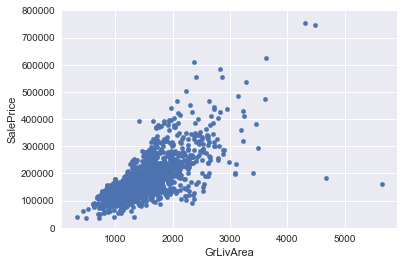

In [7]:
#散布図 grlivarea/saleprice

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### <考察>　上の散布図から'SalePrice'の100000〜300000の間に点が集中していることがわかる

うーん、「SalePrice」と「GrLivArea」は本当に古い友達で、線形関係です。

'TotalBsmtSF'はどうですか？

### 下記のメソッドは'SalePrice'と 'TotalBsmtSF'　の散布図を作成

varに'TotalBsmtSF'を代入  
pd.concat（）で、df_train['SalePrice']と、df_train[var]を列方向に連結しdataに代入  
plot.scatter（）でdataをｘ座標 'TotalBsmtSF'、y座標'SalePrice'の散布図で表示

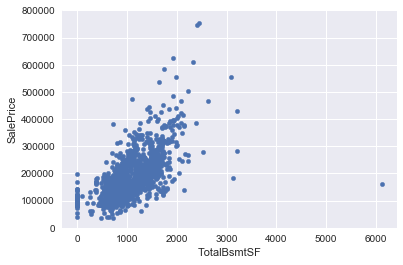

In [ ]:
#　散布図totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

 #### <考察>　上の散布図から'SalePrice'の100000〜300000の間に点が集中しているが、'GrLivArea'との関係よりも点の密度が高く見える

「TotalBsmtSF」もまた「SalePrice」の素晴らしい友人ですが、これははるかに情的関係に見えます！ すべてが大丈夫です。突然、強い線形（指数関数的？）反応で、すべてが変化します。
さらに、時には「TotalBsmtSF」が「SalePrice」にゼロクレジットを与えることもあります。

### カテゴリの特徴との関係

 ### 下記のカーネルは'SalePrice'と'OverallQual'の箱ひげ図を作成
 
 var に'OverallQual'を代入し
df_train['SalePrice']とdf_train[var]を列方向に連結しdataに代入　　
plt.subplots:　　
>https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html　　

f, ax = plt.subplots(figsize=(8, 6))：プロットするグラフのサイズを設定。figsize=(8, 6)はデフォルトの図のサイズで数字はインチ。  
sns.boxplot:箱ひげプロットをおこなう。'OverallQual'をx軸に"SalePrice"をy軸に設定しプロットのためのデータセットはdataとしfigに格納　　
>https://seaborn.pydata.org/generated/seaborn.boxplot.html　　　　

y軸の最小値０、最大値を800000に設定し表示


In [ ]:
#　箱ひげ図 overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### <考察>　上の箱ひげ図から'OverallQual'の値と'SalePrice'が比例していることがわかる

*すべてのかわいい女の子のように、「SalePrice」は「OverallQual」を楽しんでいます。 

自己へのメモ：マクドナルドが初デートに適しているかどうかを検討する*

### 下記のカーネルは'YearBuilt'と'SalePrice'との箱ひげ図を作成
var に'YearBuilt'を代入  
次にdf_train['SalePrice']とdf_train[var]を列方向に連結しdataに格納。
figsize=(8, 6)で出力するグラフのサイズを指定。
sns.boxplot(x=var, y="SalePrice", data=data)でx軸 'YearBuilt'、y軸"SalePrice"の箱ひげプロットを行う 。データセットはdata。  
y軸の最小値０、最大値を800000に設定し表示  
x軸のラベルを90度回転して表示


In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### <考察>箱ひげ図から大恐慌時代は販売価格が低く範囲が狭いことがわかる。近年は価格の上昇と販売価格の範囲が広がっている傾向があることがわかる。

*強い傾向ではありませんが、私は 'SalePrice'が古い遺物よりも新しいものにもっとお金を使いやすい傾向があると言えます。

<b>注</b>：「SalePrice」が一定価格であるかどうかはわかりません。 一定の価格はインフレの影響を取り除こうとします。 'SalePrice'が一定価格でない場合、そうあるべきなので、価格でなければならないので、価格は年を経て比較します。

### 要約すると

ストーリーはさておき、次のように結論づけることができます：

* 'GrLivArea'と 'TotalBsmtSF'は 'SalePrice'と線形関係にあるようです。 両者は正の関係です。つまり、一方の変数が増加すると他方の変数も増加します。'TotalBsmtSF'の場合、線形関係の傾きが特に高いことがわかります。
* 'OverallQual'と 'YearBuilt'も 'SalePrice'と関連しているようです。 'OverallQual'のケースでは、販売価格が全体の品質とともにどのように上昇するかをボックスプロットで示しています。

私たちは4つの変数を分析しましたが、分析する必要がある変数は他にもたくさんあります。 ここでのトリックは、正しい機能（機能選択）の選択であり、機能の複雑な関係の定義（フィーチャ・エンジニアリング）ではないようです。

つまり、小麦を籾殻から分離しましょう。

   # 3. 落ち着いてスマートに働く

今まで私たちは直感に従い、重要であると考えた変数を分析しました。 私たちの分析に客観的な性格を与える努力にもかかわらず、我々の出発点は主観的であったと言わざるを得ない。

エンジニアとして、私はこのアプローチに慣れていません。 すべての私の教育は、主観的な風に耐えることができる訓練された心を開発することでした。 それには理由があります。 構造工学で主観的であろうとするほど物事が崩れていくのがわかります。 それは傷つくことがあります。

### 'plasma soup'は

「最初はプラズマスープ以外は何もなかった。 私たちの宇宙論の研究の開始時に、これらの短い時間のうちに知られていることは、主に推測です。 しかし科学は、今日の宇宙について知られていることに基づいて、おそらく何が起こったのかを描いたものです。 （出典：http：//umich.edu/~gs265/bigbang.htm）

宇宙を探索するために、私たちは「プラズマスープ」を理解するための実用的なレシピから始めます：
*相関行列（ヒートマップ形式）。
* 'SalePrice'相関行列（ズームヒートマップスタイル）。
*最も相関の高い変数間の散布図（ジャガースタイルのように動く）。

※相関行列とは相関行列とは、相関係数を並べたものであり、その意味から対称行列になる。 相関係数は、２つの系列の似ている度合いを測る尺度のことで、-1～1の間の値をとる。 ２つの系列は要素が同数でなければならず、系列それぞれをベクトルとみなしたとき、両ベクトルが同じ向き（一方のベクトルを正の定数倍したとき他方のベクトルになる。）


#### 相関行列（ヒートマップ形式）

### 下のカーネルはデータセットの相関関係をヒートマップ図で表示

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
１行目はdf_train.corr()でdf_trainの各列間の相関係数を算出し、corrmatに格納  
２行目はfigsize=(12, 9)のサイズでプロットされるグラフのサイズを設定  
3行目のsns.heatmap()はヒートマップの可視化を行うメソッド

In [ ]:
#相関行列
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

私の意見では、このヒートマップは、「プラズマスープ」とその関係をすばやく概観する最良の方法です。 （ありがとう@seaborn！）  
一見すると、私の注意を引く2つの赤い色の四角があります。最初の四角は 'TotalBsmtSF'と '1stFlrSF'変数をさし、2番目の四角は 'Garage * X *'変数を指します。  
どちらの場合も、これらの変数間の相関がどの程度重要であるかを示しています。実際、この相関は非常に強く、多重共線性の状況を示唆している可能性があります。もしこれらの変数について考えるならば、それらがほぼ同じ情報を与えているのでｒ多重線形性が実際に発生すると結論付けることができます。ヒートマップはこのような状況を検出するのに最適で、私たちのような機能選択が支配的な問題では、それらは不可欠なツールです。
私の注目を集めた別のものは、「SalePrice」の相関関係でした。大声で「Hi」といっているようなすでに知っている「GrLivArea」、「TotalBsmtSF」、「OverallQual」はわかりますが、考慮すべき他の多くの変数も見ることができます。 それが私たちが次にやることです。

※多重共線性（multicollinearity）とは： 通称「マルチコ」。 独立変数間に非常に強い相関があったり，一次従属な変数関係がある場合には，解析が不可能（「逆行列が求まりません」というエラーメッセージが出力される）であったり，たとえ結果が求まったとしてもその信頼性は低い。 このような場合に多重共線性があると言われる。

### 'SalePrice'相関行列（ズームヒートマップスタイル）

### 下記のカーネルは'SalePrice'と相関関係が強い上位１０個の要素とのヒートマップ

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

'SalePrice'で大きい方から10個の値を取得し、それらに対応する相関係数を取得し、さらにそれらとSalePrice'との相関係数の値を取得しそのインデックスを変数colsに格納
２行目はcols内の各インデックスの値の二次元配列を転置し、相関行列にして変数cmに格納  
3行目はシーボーンのフォントサイズを１２．５に設定  
４行目はヒートマップを変数hmに格納  
５行目で表示  

In [ ]:
#saleprice 相関行列
k = 10 #　ヒートマップの変数の数
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

私たちのクリスタルボールによると、これらは「SalePrice」と最も関連性のある変数です。これについての私の考えは：  

* 'OverallQual'、 'GrLivArea'、 'TotalBsmtSF'は 'SalePrice'と強く相関しています。チェック！
* 'GarageCars'と 'GarageArea'は、最も強く相関する変数の一部です。しかし、最後のサブポイントで議論したように、ガレージに収まる車の数はガレージの面積の結果です。  
「GarageCars」と「GarageArea」は、双子の兄弟のようなものです。それらを区別することはできません。したがって、分析にはこれらの変数のうちの1つだけが必要です（GarageCarsは 'SalePrice'との相関が強いので残せます）。  
* 'TotalBsmtSF'と '1stFloor'も双子の兄弟のようです。 「TotalBsmtSF」は最初の推測が正しかったと言うことができます（読み直して「何を期待できますか？」）。  
* 'FullBath'？ 本当に？  
* 'TotRmsAbvGrd'と 'GrLivArea'、双子の兄弟。 チェルノブイリのデータセットですか？  
*ああ...「YearBuilt」...「YearBuilt」は「SalePrice」と少し相関があるようです。 正直なところ、私は「YearBuilt」について考えることを恐れています。なぜなら、私は、この正当性を得るために時系列分析を少し行うべきだと感じ始めているからです。 私はこれを宿題として残しておきます。  

散布図に進んでみましょう。


#### 'SalePrice'と相関変数間の散布図（ジャガースタイルのように動く）

あなたが見ようとしているものを準備しましょう。 私はこれらの散布図を初めて見たとき、私は完全に吹き飛ばされたことを告白する必要があります！ 非常に短いスペースで多くの情報を...それは素晴らしいです。 もう一度、@seabornに感謝します！ あなたは私をジャガーのように動かす！

### 下記のカーネルは上の図を散布図として表示

1行目でSeabornのデフォルトスタイルが適用される  
2行目で各カラム名をリストcolsに格納  
3行目でcols内のcols内全てのカラム同士の相関関係を表す散布図を作成して表示

In [ ]:
#散布図
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

#### <考察>　上のヒートマップの各マス目を散布図として表示している。'OverallQual'、 'GrLivArea'、 'TotalBsmtSF'は全体的に右肩上がりで改めて相関が強いことがわかる

私たちは既にいくつかの主要な図を知っていますが、このメガ散布図は、変数の関係について合理的なアイデアを与えてくれます。
面白いと思われる図の1つは、「TotalBsmtSF」と「GrLiveArea」の間のものです。この図では、点が直線のように線を描いていることがわかります。直線はほぼ境界線のように振舞っています。ドットの大部分がそのラインの下にとどまることは、完全に理にかなっています。地下のエリアは上記の居住エリアと同じですが、地上の居住区域よりも大きな地下室面積は期待できません（バンカーを買おうとしている場合を除き）。「SalePrice」と「YearBuilt」に関するプロットもまた私たちに考えさせることがある。「ドットクラウド」の一番下には、指数関数が恥ずかしがり屋のように現れて見えるものもあります（創造的に）。
また、最後の年に関するドットのセットがこの制限をあまりにも超えている傾向にあることに注意してください（私はただ価格が今より速くなっていると言いたかった）。
さあ、十分なロールシャッハ検査があります。 欠損しているものに進みましょう：欠損データ！

# 4.欠損データ
欠落しているデータを考える際の重要な質問：  
*欠けているデータはどれくらいの頻度であるのですか？  
*欠損データはランダムか、規則性がありますか？  
欠落しているデータはサンプルサイズの縮小を意味する可能性があるため、これらの質問に対する答えは実用的な理由から重要です。 これにより、分析を進めることを防止させることができます。 さらに、実質的な観点から、欠損データプロセスに偏りがなく、不都合な真実が隠されていることを確証しなければなりません。

 ### 下記のカーネルは欠損データを算出
1行目は各カラムの欠損データの個数をカウントし降順に並び替えtotalに格納  
2行目は各カラムの欠損データの個数を全カラムの欠損データの個数で割った値を降順に並べてpercentに格納し  
3行目はtotalとpercentを列方向に連結し、それぞれにkeysキーワードで指定した、'Total', 'Percent'のラベルを追加し、missing_dataに格納
 最後に上位20位までを表示

In [ ]:
#　欠損データ
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

欠損データをどのように処理するかを理解するためにこれを分析してみましょう。　 
データの15％以上が欠落している場合は、対応する変数を削除し、それが存在しなかったふりをするべきです。  
このことは、これらのケースで欠損データを埋めるためのトリックを試行しないことを意味します。  
これによれば、削除すべき一連の変数（「PoolQC」、「MiscFeature」、「Alley」など）があります。  
要点は：このデータを失うか？私はそうは思わない。これらの変数はどれも重要ではないようです。ほとんどは家を買うときに考えている側面ではないためだからです（それがデータが欠落している理由かもしれません）。  
さらに、変数を詳しく見ると、「PoolQC」、「MiscFeature」、「FireplaceQu」などの変数は外れ値の候補になるので、削除させていただきます。  
これによれば残りのケースに関係するものでは、「Garage * X *」変数のデータの欠落数が同じであることがわかります。私は不足しているデータは同じ観測値を参照していると考えています（私はチェックしませんが、5％で5ドル問題で20ドルを使うべきではありません）。ガレージに関する最も重要な情報は「GarageCars」で表現されており、欠落しているデータの5％を話していることを考慮して、前述の「Garage * X *」変数を削除します。同じロジックが 'Bsmt * X *'変数に適用されます。不足しているデータは、観測と同じセット数であると考えています（私はそれをチェックしませんが、それはたったの5％で、5ドルの問題で20ドルを使うべきではありません）。  
ガレージに関する最も重要な情報は「GarageCars」で表現されており、紛失したデータの約5％を話しているだけであることを考慮して、前述の「Garage * X *」変数を削除します。同じロジックが 'Bsmt * X *'変数に適用されます。  
'MasVnrArea'と 'MasVnrType'に関して、これらの変数は必須ではないと考えることができる。 さらに、彼らはすでに考慮されている 'YearBuilt'と 'OverallQual'と強い相関関係があります。したがって、 'MasVnrArea'と 'MasVnrType'を削除したとしても情報は失われません。
最後に、'Electrical'には1つの欠測値があります。 これはただ一つの観測であるため、この観測値を削除して変数を保持します。  
要約すると、欠損データを処理するために、変数 'Electrical'を除いて、欠落したデータを含むすべての変数を削除します。'Electrical'では、欠損データの観測値を削除します。


### 下記のカーネルは欠損データを持つカラムのデータを削除している
1行目でmissing_dataのカラム'Total'内で1より大きいデータをもつインデックスを取得し削除後、df_trainを更新  
２行目でdf_trainのカラム'Electrical'内にNaNがある行データ削除後、df_trainを更新  
最後にdf_trainに欠損データの数をカウント表示

In [ ]:
#欠損データ扱う
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()   # ちょうど欠損データがないことをチェックしている...

# 嘘つき！

外れ値も、知っておくべきものです。 どうして？ 外れ値はモデルに著しい影響を与える可能性があり、特定の動作についての洞察を提供する貴重な情報源になる可能性があるからです。

外れ値は複雑な主題であり、それはより注意を払う必要がある。 ここでは、「SalePrice」の標準偏差と散布図を簡単に分析します。

### 単変量解析

ここでの主な関心事は、外れ値としての観測値を定義するしきい値を設定することです。 そのために、データを標準化します。 この文脈において、データ標準化とは、データ値を平均値0および標準偏差1に変換することを意味する。

### 下記のカーネルは'SalePrice'を標準化して上位からと下位から10個の要素を取得
StandardScaler:  
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

データセットdf_trainからカラム'SalePrice'の配列の次元を一つ増やしたあと標準化して、saleprice_scaledに格納  
saleprice_scaledの全行０列データを取得し昇順でソート。インデックス0から９までをスライスしてlow_rangeに格納  
saleprice_scaledの全行０列データを取得し昇順でソート。最後から１０個までをスライスしてlow_rangeに格納  

それぞれ表示

In [ ]:
#データを標準化
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

彼女の新しい服で「SalePrice」がどのように見えるか：

*　低範囲の値は似ていて、0からあまり離れていません。
*　高範囲の値は0からずっと離れていて、7の値は実際には範囲外です。

ここでは、これらの値のいずれも外れ値としては考慮しませんが、これらの2つの値に注意する必要があります。

### 二変量解析
#### ※ ２つの変数を対象に相関関係を解析すること

私たちはすでに、以下の散布図を心に刻んでいます。 しかし、私たちが新しい視点から物事を見ると、常に何か発見することがあります。 アラン・ケイが「視点の変化はIQ８０に値する。」と言ったように。

### 下記のカーネルは'GrLivArea'と'SalePrice'との散布図を作成
'GrLivArea'を変数varに代入  
データセットdf_train['SalePrice']とdf_train[var]を列方向に連結  
x軸に'GrLivArea'、y軸に'SalePrice'をとり散布図を表示

In [ ]:
#　２変量解析 saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

明らかになったこと：

*　大きな「GrLivArea」を持つ2つの値は奇妙に見え、群衆に追いつかない。 なぜこれが起こっているのか推測することができます。 多分彼らは農業地域を指していて、それらが低価格を説明できるだろう。 私ははっきりはわからないが、これら2つの点が典型的な事例を代表するものではないと確信している。 したがって、それらを異常値として定義して削除することにする。

*　プロットの上の2つの観測は、我々が注意すべきであると言った7.なんとかの観察である。 彼らは2つの特別なケースのように見えますが、それは傾向に従っているようです。 そのため、私たちはそれらを保管します。


## 下記のカーネルは 'GrLivArea'の外れ値を削除している

In [ ]:
#点を削除する
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

## 下記のカーネルは'TotalBsmtSF'と'SalePrice'との散布図を作成

In [ ]:
#２変数解析 saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

いくつかの観測値（たとえばTotalBsmtSF> 3000）を排除したいと思うかもしれませんが、その価値はないと思います。 私たちはそれで生きることができるので、何もしません。

# 5. ハードコアを取得

Ayn Randの小説「Atlas Shrugged」では、頻繁に繰り返される質問が、「John Galtは誰ですか？」だ。この本の大部分は、この質問に対する答えを見つけるための探求です。

私は今、ランディアンを感じる。 「SalePrice」は誰ですか？

この質問に対する答えは、多変量解析のための統計的根拠の基礎となる仮定をテストすることにある。私たちはすでにデータクリーニングを行い、「SalePrice」について多くのことを発見しました。今度は、「SalePrice」が多変量解析技術を適用するための統計的前提条件をどのように遵守しているかを深く理解しましょう。

[Hair et al。 （2013）]（https://amzn.to/2uC3j9p）　では、4つの前提条件がテストされる必要があります。

* <b>正規性</b> - 正規性について言えば、データは正規分布のように見えるということです。これはいくつかの統計テストがこれに依存しているため重要です（例：t検定）。
　この練習では、「SalePrice」の単変量正規性をチェックします（これは限定的なアプローチです）。単変量正規性は多変量正規性（私たちが望むもの）を保証するものではありませんが、役には立ちます。考慮すべきもう一つの詳細は、大きなサンプル（> 200回の観測）では、正規性はそのような問題ではないということです。しかし、正規性を解くと、他の多くの問題（例えば、分散不均一性）を避けることができ、それがこの分析を行う主要な理由です。

* <b>等分散性</b> - 私は正しいと思っています。等分散性とは、従属変数が予測変数の範囲全体で均等な変数のレベルを示す仮定をいう（Hair et al。、2013）（https://amzn.to/2uC3j9p）。　独立変数のすべての値にわたって誤差項を同じにしたいので、等分散性が望ましい。

* <b>線型性</b> - 線型性を評価する最も一般的な方法は、散布図を調べて線形パターンを探すことです。パターンが線形でない場合、データ変換を探索する価値があるでしょう。しかし、私たちが見た散布図のほとんどは線形関係を持っているように見えるので、これには立ち入りません。

* <b>相関エラーの不在</b> - 定義が示唆するように、相関エラーは、あるエラーが起こった時に別のエラーと相関している。 例えば、ある正のエラーが体系的に負のエラーを起こすと、これらの変数間に関係があることを意味します。 これは時系列で頻繁に発生し、いくつかのパターンは時間に関連しています。 私たちはこれにも関わらないでしょう。 ただし、何かを検出した場合は、その効果を説明できる変数を追加してみてください。 これは相関エラーの最も一般的な解決策です。
　
　エルヴィスがこの長い説明について何を言っていると思いますか？ 「会話が少し少なく、もう少し行動してください」 おそらく..ところで、エルヴィスの最後の大ヒットは何だった知っていますか？
 
 （...）
　バスルームの床。

### 正規性の探索において

ここでのポイントは非常に無駄のない方法で 'SalePrice'をテストすることです。 私たちはこれに注意を払って行います：

* <b>ヒストグラム</b> - 尖度と歪度。
* <b>ノーマル確率プロット</b> - データ分布は、正規分布を表す対角線に厳密に従う必要があります。

### 下記のカーネルは正規化した'SalePrice'のヒストグラムとカーネル密度推定による確率密度関数を表示している。さらにその下の図では'SalePrice'の散布図をプロットしている。

https://seaborn.pydata.org/generated/seaborn.distplot.html

In [ ]:
#ヒストグラムと正規確率分布
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

「SalePrice」は正常ではありません。 「尖り」は、正の歪度を示し、対角線に沿っていません。
しかし、すべてが失われません。 簡単なデータ変換で問題を解決できます。 これは統計的な本で学ぶことができるすばらしいものの1つです。正の歪度の場合、通常は対数変換がうまくいきます。 私がこれを発見したとき、私はホグワーツの学生が新しい涼しい呪文を発見したように感じました。

 '*Avada kedavra!*'

### 下記のカーネルは'SalePrice'を対数変換した後、正規化し上図同様にプロットしている。

In [ ]:
#対数変換を適用
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
#変換されたヒストグラムと正規確率分布
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

完了！ 「GrLivArea」で何が起こっているのか調べてみましょう。

### 下記のカーネルは正規化した'GrLivArea'のヒストグラムとカーネル密度推定による確率密度関数を表示している。さらにその下の図では'GrLivArea'の散布図をプロットしている。

In [ ]:
#ヒストグラムと正規確率分布
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

尖っている味がします... *Avada kedavra!*

### 下記のカーネルは'GrLivArea'を対数変換したあと正規化し上図同様にプロット

In [ ]:
#データ変換
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

### 下記のカーネルは'TotalBsmtSF'のデータをヒストグラムとカーネル密度推定による確率密度関数を表示している。さらにその下の図では'TotalBsmtSF'の散布図をプロットしている。

In [ ]:
#変換されたヒストグラムと正規確率分布
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

さて、私たちは大ボスを扱っています。 ここには何がありますか？

*何かは、一般に、歪度を提示するものです。
*価値ゼロの観測（地下のない住宅）がかなり多い
*値ゼロでは対数変換を実行できないため大きな問題。

ここで対数変換を適用するには、基底（バイナリ変数）を持つか持っていないかでの効果を得るための変数を作成します。 
次に、ゼロ以外のすべての観測値に対して対数変換を行い、値ゼロの観測値は無視します。 このようにして、私たちは基底を持つかどうかの影響を失うことなく、データを変換することができます。

このアプローチが正しいかどうかはわかりません。 私にとっては正しいと思われました。 それが私が「ハイリスク工学」と呼ぶものです。

<b>※対数変換：データxを、任意の値a、bを用いて下式に従い変換すること。
$$x \longmapsto \log_a (x + b)$$</b>

### 下記のカーネルは新しいカラム'HasBsmt'を作成し、df_train['TotalBsmtSF']>0であるものを'HasBsmt'を１に置き換えている。

In [ ]:
#　新しい変数でカラムを作成(バイナリカテゴリ機能だから一つで十分)
#もし　area>0 ならば1を取得, area==0 ならば0を取得
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

### 'TotalBsmtSF'データを対数変換した値を、新たに 'TotalBsmtSF'データに代入している。

In [ ]:
#データ変換
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
#ヒストグラムと正規確率分布

sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### 最初の試行で「等分散性」を正しく書くための検索で

2つの計量変数の等分散性をテストする最良の方法は、図を用いることです。 等分散からの出発は、円錐（グラフの一方の側に小さな分散、反対側に大きな分散）またはダイヤモンド（分布の中心に多数の点）のような形状によって示される。

'SalePrice'と 'GrLivArea'で始まる...

### 下記のカーネルは'GrLivArea'と'SalePrice'との散布図を作成

In [ ]:
#　散布図
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

この散布図の以前のバージョン（対数変換の前）は円錐形をしていました（ 'SalePriceと相関変数の間の散布図を確認してください（ジャガースタイルのように動く）'）。 ご覧のように、現在の散布図はもはや円錐形をしていません。 それが正規性の力です！ いくつかの変数の正規性を保証するだけで、我々は等分散問題を解決しました。

次に、 'SalePrice'と 'TotalBsmtSF'を確認しましょう。

### 下記のカーネルは'TotalBsmtSF'と'SalePrice'との散布図を作成

In [ ]:
#散布図
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

一般的に、「SalePrice」は、「TotalBsmtSF」の範囲で均等な分散レベルを示すと言えます。

クール！

# 最後に、ダミー変数

簡単モード

In [ ]:
#　カテゴリ変数をダミーに変換する
df_train = pd.get_dummies(df_train)

# 結論

これでおしまい！ 私たちは演習の最後に到達しました。

このカーネル全般で、[Hair et al。 （2013）]（https://amzn.to/2uC3j9p）　で提供された多くの戦略を実践した。我々は変数を哲学し、「SalePrice」のみを分析し、最も相関のある変数を用いて欠損データと外れ値を処理し、いくつかの基本的な統計的仮説をテストし、カテゴリー変数をダミー変数に変換した。 これは、Pythonによって私たちは大変助けられ簡単に作業できた。

しかし、探求は終わっていない。 私たちの話はFacebookの研究で止まったことを忘れないで。 今度は、「SalePrice」に電話をかけて、彼女を夕食に招待しましょう。 彼女の行動を予測してみてください。 あなたは彼女が正則化線形回帰アプローチを楽しんでいる女の子だと思いますか？ それとも、彼女がアンサンブルの方法を好むと思いますか？ それとも別の何か？

見つけ出すのはあなた次第です。

# <b>参照</b>
* [My blog](http://pmarcelino.com)
* [My other kernels](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://amzn.to/2uC3j9p)

# 謝辞
この原稿を読んでくれたJoão Rico(https://www.linkedin.com/in/joaomiguelrico/) に感謝します。
